In [1]:
from __future__ import print_function
import logging
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import transforms
import torch.nn.functional as F
from PIL import Image
import torch.optim as optim
import os
from os import listdir
import random
import copy
from torch.utils.data import DataLoader
from skimage import measure #supports video also
import pickle
from scipy.spatial import distance
import time
import platform
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random
import math
import numpy as np
from PIL import Image
import copy
import logging
import time
import sys
sys.path.append('..')
# sys.path.append(path.join(path.dirname(__file__), '..'))
from utils.io import imshow
from utils.io import figure_save
from utils.Network import Network
from utils.Analyser import Analyser
from utils.io import save_network, save, load, figure_save, load_network, make_folder_results, imshow
from utils.format import hex_str2bool
from utils.WaveDataset import create_datasets, transformVar
from utils.training import test
from utils.Scorekeeper import Scorekeeper
from utils.training import initial_input, reinsert, propagate

logging.basicConfig(format='%(message)s',level=logging.INFO)
channels=1
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

nr_net = 0 

version = nr_net + 10
network_type = "ConvAE_LSTM_1ch_0/"

if 'Darwin' in platform.system():
    data_dir = '../'
else:
    data_dir = '/disk/scratch/s1680171/wave_propagation/'

if not os.path.isdir("../Results"):
    os.mkdir("../Results")
results_dir = "../Results/" + network_type 

if not os.path.isdir(results_dir):
    make_folder_results(results_dir)
    
# Data
filename_data = results_dir + "all_data.pickle"
if os.path.isfile(filename_data):
    logging.info('Loading datasets')
    all_data = load(filename_data)
    train_dataset = all_data["Training data"]
    val_dataset = all_data["Validation data"]
    test_dataset = all_data["Testing data"]
else:
    logging.info('Creating new datasets')
    test_dataset, val_dataset, train_dataset = create_datasets(
         data_dir+"Video_Data/", transformVar, test_fraction=0.15, validation_fraction=0.15, check_bad_data=False, channels=channels)
    all_data = {"Training data": train_dataset, "Validation data": val_dataset, "Testing data": test_dataset}
    save(all_data, filename_data)

train_dataset.root_dir = '../Video_Data/'
val_dataset.root_dir = '../Video_Data/'
test_dataset.root_dir = '../Video_Data/'

train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=12)
val_dataloader = DataLoader(val_dataset, batch_size=16, shuffle=True, num_workers=12)
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=True, num_workers=12)

model = Network(device, channels)
model = load_network(model, device, results_dir+"model.pt")

Loading datasets


Testing batch 1 out of 31
Testing batch 2 out of 31
Testing batch 3 out of 31
Testing batch 4 out of 31
Testing batch 5 out of 31
Testing batch 6 out of 31
Testing batch 7 out of 31
Testing batch 8 out of 31
Testing batch 9 out of 31
Testing batch 10 out of 31
Testing batch 11 out of 31
Testing batch 12 out of 31
Testing batch 13 out of 31
Testing batch 14 out of 31
Testing batch 15 out of 31
Testing batch 16 out of 31
Testing batch 17 out of 31
Testing batch 18 out of 31
Testing batch 19 out of 31
Testing batch 20 out of 31
Testing batch 21 out of 31
Testing batch 22 out of 31
Testing batch 23 out of 31
Testing batch 24 out of 31
Testing batch 25 out of 31
Testing batch 26 out of 31
Testing batch 27 out of 31
Testing batch 28 out of 31
Testing batch 29 out of 31
Testing batch 30 out of 31
Testing batch 31 out of 31


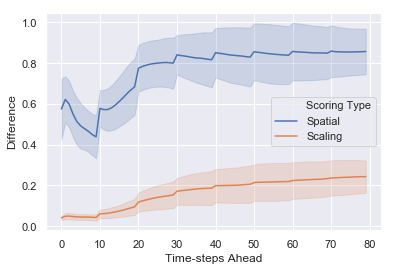

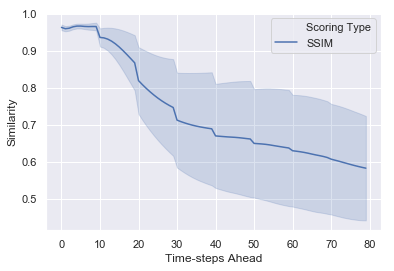

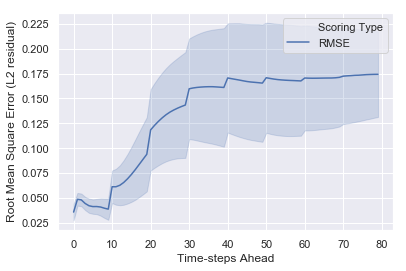

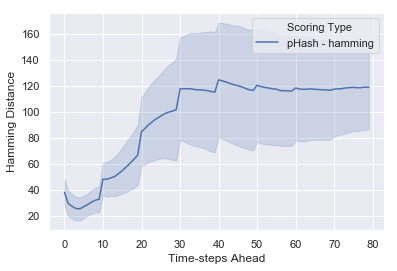

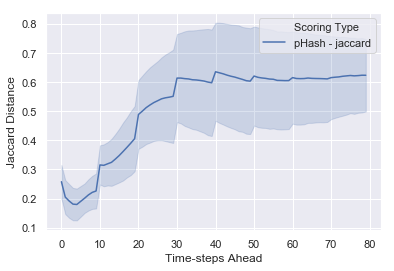

In [2]:
# from utils.WaveDataset import normalize
normalize={'std':1,'mean':0}
starting_point=15
num_input_frames = 5
reinsert_frequency = 10
score_keeper = Scorekeeper(results_dir,channels,normalize)
figures_dir = os.path.join(results_dir, 'figures')
test(model, test_dataloader, starting_point, num_input_frames, reinsert_frequency, 
            channels, device, score_keeper, figures_dir, plot=False, debug=False)
score_keeper.plot()

In [3]:
from utils.Scorekeeper import Scorekeeper

logging.basicConfig(format='%(message)s',level=logging.INFO)
channels=1
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

nr_net = 0 

version = nr_net + 10
network_type = "ConvAE_LSTM_1ch_1/"

if 'Darwin' in platform.system():
    data_dir = '../'
else:
    data_dir = '/disk/scratch/s1680171/wave_propagation/'

if not os.path.isdir("../Results"):
    os.mkdir("../Results")
results_dir = "../Results/" + network_type 

if not os.path.isdir(results_dir):
    make_folder_results(results_dir)
    
# Data
filename_data = results_dir + "all_data.pickle"
if os.path.isfile(filename_data):
    logging.info('Loading datasets')
    all_data = load(filename_data)
    train_dataset = all_data["Training data"]
    val_dataset = all_data["Validation data"]
    test_dataset = all_data["Testing data"]
else:
    logging.info('Creating new datasets')
    test_dataset, val_dataset, train_dataset = create_datasets(
         data_dir+"Video_Data/", transformVar, test_fraction=0.15, validation_fraction=0.15, check_bad_data=False, channels=channels)
    all_data = {"Training data": train_dataset, "Validation data": val_dataset, "Testing data": test_dataset}
    save(all_data, filename_data)

train_dataset.root_dir = '../Video_Data/'
val_dataset.root_dir = '../Video_Data/'
test_dataset.root_dir = '../Video_Data/'

train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=12)
val_dataloader = DataLoader(val_dataset, batch_size=16, shuffle=True, num_workers=12)
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=True, num_workers=12)

model = Network(device, channels)
model = load_network(model, device, results_dir+"model.pt")

Loading datasets


Testing batch 1 out of 31
Testing batch 2 out of 31
Testing batch 3 out of 31
Testing batch 4 out of 31
Testing batch 5 out of 31
Testing batch 6 out of 31
Testing batch 7 out of 31
Testing batch 8 out of 31
Testing batch 9 out of 31
Testing batch 10 out of 31
Testing batch 11 out of 31
Testing batch 12 out of 31
Testing batch 13 out of 31
Testing batch 14 out of 31
Testing batch 15 out of 31
Testing batch 16 out of 31
Testing batch 17 out of 31
Testing batch 18 out of 31
Testing batch 19 out of 31
Testing batch 20 out of 31
Testing batch 21 out of 31
Testing batch 22 out of 31
Testing batch 23 out of 31
Testing batch 24 out of 31
Testing batch 25 out of 31
Testing batch 26 out of 31
Testing batch 27 out of 31
Testing batch 28 out of 31
Testing batch 29 out of 31
Testing batch 30 out of 31
Testing batch 31 out of 31


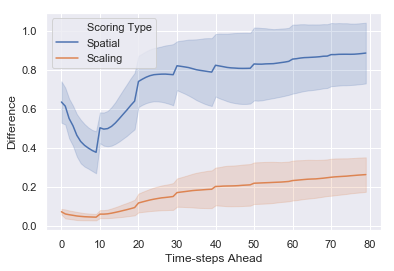

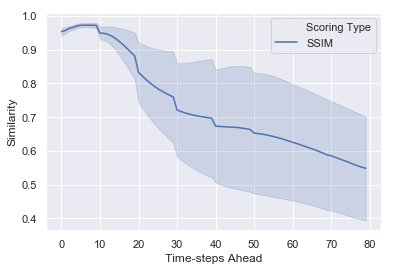

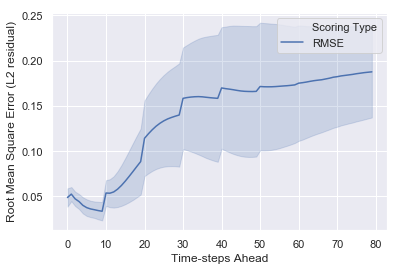

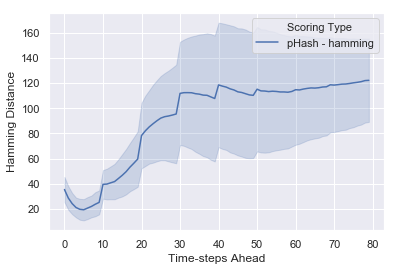

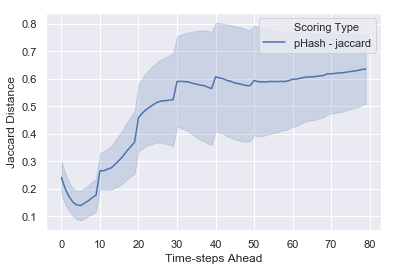

In [4]:
# from utils.WaveDataset import normalize
normalize={'std':1,'mean':0}
starting_point=15
num_input_frames = 5
reinsert_frequency = 10
score_keeper = Scorekeeper(results_dir,channels,normalize)
figures_dir = os.path.join(results_dir, 'figures')
test(model, test_dataloader, starting_point, num_input_frames, reinsert_frequency, 
            channels, device, score_keeper, figures_dir, plot=False, debug=False)
score_keeper.plot()

# 3 Channels

In [6]:
from utils.Scorekeeper import Scorekeeper

logging.basicConfig(format='%(message)s',level=logging.INFO)
channels=3
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

nr_net = 0 

version = nr_net + 10
network_type = "ConvAE_LSTM_3ch_0/"

if 'Darwin' in platform.system():
    data_dir = '../'
else:
    data_dir = '/disk/scratch/s1680171/wave_propagation/'

if not os.path.isdir("../Results"):
    os.mkdir("../Results")
results_dir = "../Results/" + network_type 

if not os.path.isdir(results_dir):
    make_folder_results(results_dir)
    
# Data
filename_data = results_dir + "all_data.pickle"
if os.path.isfile(filename_data):
    logging.info('Loading datasets')
    all_data = load(filename_data)
    train_dataset = all_data["Training data"]
    val_dataset = all_data["Validation data"]
    test_dataset = all_data["Testing data"]
else:
    logging.info('Creating new datasets')
    test_dataset, val_dataset, train_dataset = create_datasets(
         data_dir+"Video_Data/", transformVar, test_fraction=0.15, validation_fraction=0.15, check_bad_data=False, channels=channels)
    all_data = {"Training data": train_dataset, "Validation data": val_dataset, "Testing data": test_dataset}
    save(all_data, filename_data)

train_dataset.root_dir = '../Video_Data/'
val_dataset.root_dir = '../Video_Data/'
test_dataset.root_dir = '../Video_Data/'

train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=12)
val_dataloader = DataLoader(val_dataset, batch_size=16, shuffle=True, num_workers=12)
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=True, num_workers=12)

model = Network(device, channels)
model = load_network(model, device, results_dir+"model.pt")

Loading datasets


batch_num 0	future_frame_idx 0	type Initial input
torch.Size([16, 3, 128, 128]) torch.Size([16, 3, 128, 128])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


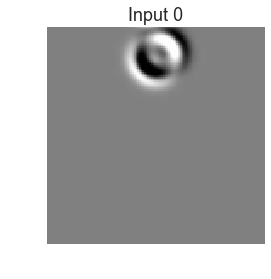

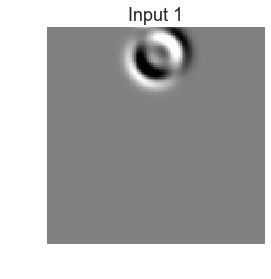

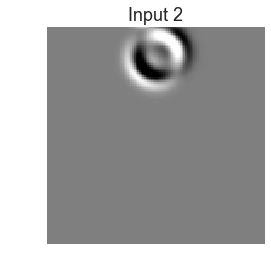

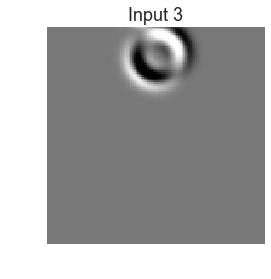

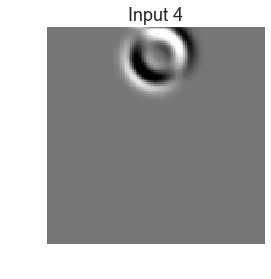

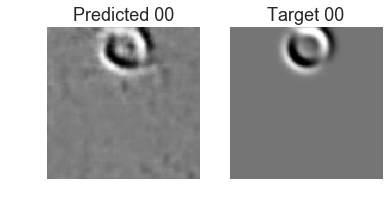

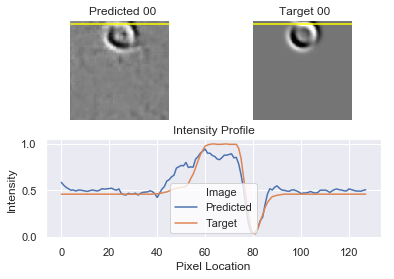

batch_num 0	future_frame_idx 1	type Propagate
torch.Size([16, 6, 128, 128]) torch.Size([16, 6, 128, 128])
batch_num 0	future_frame_idx 2	type Propagate
torch.Size([16, 9, 128, 128]) torch.Size([16, 9, 128, 128])
batch_num 0	future_frame_idx 3	type Propagate
torch.Size([16, 12, 128, 128]) torch.Size([16, 12, 128, 128])
batch_num 0	future_frame_idx 4	type Propagate
torch.Size([16, 15, 128, 128]) torch.Size([16, 15, 128, 128])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


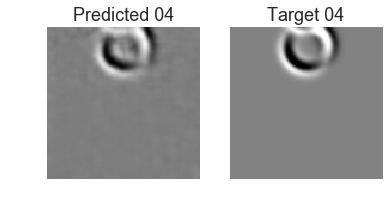

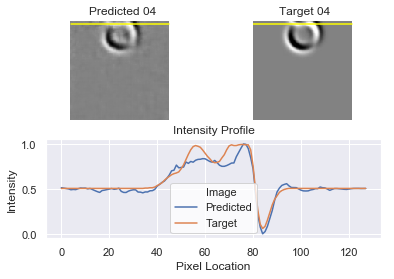

batch_num 0	future_frame_idx 5	type Propagate
torch.Size([16, 18, 128, 128]) torch.Size([16, 18, 128, 128])
batch_num 0	future_frame_idx 6	type Propagate
torch.Size([16, 21, 128, 128]) torch.Size([16, 21, 128, 128])
batch_num 0	future_frame_idx 7	type Propagate
torch.Size([16, 24, 128, 128]) torch.Size([16, 24, 128, 128])
batch_num 0	future_frame_idx 8	type Propagate
torch.Size([16, 27, 128, 128]) torch.Size([16, 27, 128, 128])
batch_num 0	future_frame_idx 9	type Propagate
torch.Size([16, 30, 128, 128]) torch.Size([16, 30, 128, 128])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


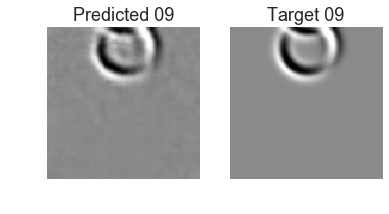

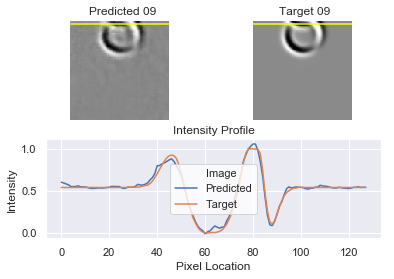

batch_num 0	future_frame_idx 10	type Reinsert
torch.Size([16, 33, 128, 128]) torch.Size([16, 33, 128, 128])
batch_num 0	future_frame_idx 11	type Propagate
torch.Size([16, 36, 128, 128]) torch.Size([16, 36, 128, 128])
batch_num 0	future_frame_idx 12	type Propagate
torch.Size([16, 39, 128, 128]) torch.Size([16, 39, 128, 128])
batch_num 0	future_frame_idx 13	type Propagate
torch.Size([16, 42, 128, 128]) torch.Size([16, 42, 128, 128])
batch_num 0	future_frame_idx 14	type Propagate
torch.Size([16, 45, 128, 128]) torch.Size([16, 45, 128, 128])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


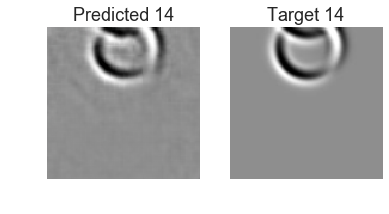

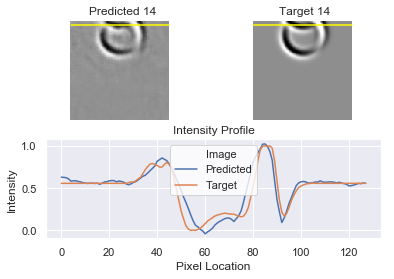

batch_num 0	future_frame_idx 15	type Propagate
torch.Size([16, 48, 128, 128]) torch.Size([16, 48, 128, 128])
batch_num 0	future_frame_idx 16	type Propagate
torch.Size([16, 51, 128, 128]) torch.Size([16, 51, 128, 128])
batch_num 0	future_frame_idx 17	type Propagate
torch.Size([16, 54, 128, 128]) torch.Size([16, 54, 128, 128])
batch_num 0	future_frame_idx 18	type Propagate
torch.Size([16, 57, 128, 128]) torch.Size([16, 57, 128, 128])
batch_num 0	future_frame_idx 19	type Propagate
torch.Size([16, 60, 128, 128]) torch.Size([16, 60, 128, 128])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


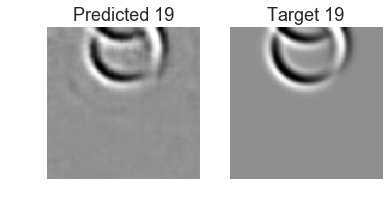

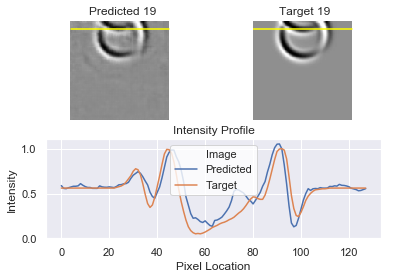

batch_num 0	future_frame_idx 20	type Reinsert
torch.Size([16, 63, 128, 128]) torch.Size([16, 63, 128, 128])
batch_num 0	future_frame_idx 21	type Propagate
torch.Size([16, 66, 128, 128]) torch.Size([16, 66, 128, 128])
batch_num 0	future_frame_idx 22	type Propagate
torch.Size([16, 69, 128, 128]) torch.Size([16, 69, 128, 128])
batch_num 0	future_frame_idx 23	type Propagate
torch.Size([16, 72, 128, 128]) torch.Size([16, 72, 128, 128])
batch_num 0	future_frame_idx 24	type Propagate
torch.Size([16, 75, 128, 128]) torch.Size([16, 75, 128, 128])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


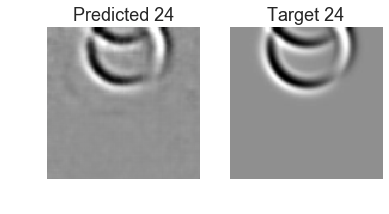

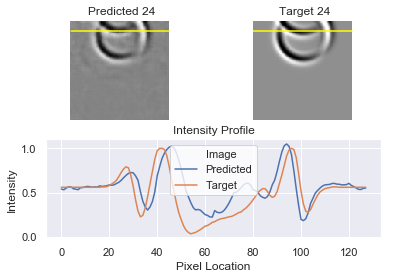

batch_num 0	future_frame_idx 25	type Propagate
torch.Size([16, 78, 128, 128]) torch.Size([16, 78, 128, 128])
batch_num 0	future_frame_idx 26	type Propagate
torch.Size([16, 81, 128, 128]) torch.Size([16, 81, 128, 128])
batch_num 0	future_frame_idx 27	type Propagate
torch.Size([16, 84, 128, 128]) torch.Size([16, 84, 128, 128])
batch_num 0	future_frame_idx 28	type Propagate
torch.Size([16, 87, 128, 128]) torch.Size([16, 87, 128, 128])
batch_num 0	future_frame_idx 29	type Propagate
torch.Size([16, 90, 128, 128]) torch.Size([16, 90, 128, 128])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


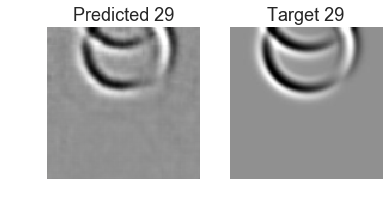

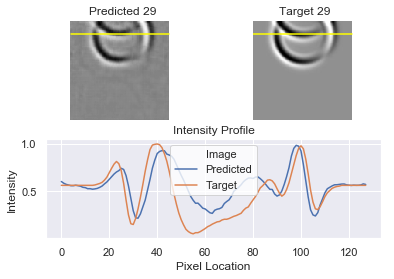

batch_num 0	future_frame_idx 30	type Reinsert
torch.Size([16, 93, 128, 128]) torch.Size([16, 93, 128, 128])
batch_num 0	future_frame_idx 31	type Propagate
torch.Size([16, 96, 128, 128]) torch.Size([16, 96, 128, 128])
batch_num 0	future_frame_idx 32	type Propagate
torch.Size([16, 99, 128, 128]) torch.Size([16, 99, 128, 128])
batch_num 0	future_frame_idx 33	type Propagate
torch.Size([16, 102, 128, 128]) torch.Size([16, 102, 128, 128])
batch_num 0	future_frame_idx 34	type Propagate
torch.Size([16, 105, 128, 128]) torch.Size([16, 105, 128, 128])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


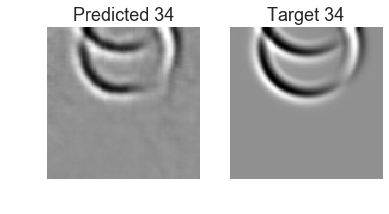

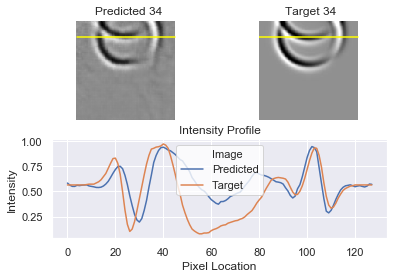

batch_num 0	future_frame_idx 35	type Propagate
torch.Size([16, 108, 128, 128]) torch.Size([16, 108, 128, 128])
batch_num 0	future_frame_idx 36	type Propagate
torch.Size([16, 111, 128, 128]) torch.Size([16, 111, 128, 128])
batch_num 0	future_frame_idx 37	type Propagate
torch.Size([16, 114, 128, 128]) torch.Size([16, 114, 128, 128])
batch_num 0	future_frame_idx 38	type Propagate
torch.Size([16, 117, 128, 128]) torch.Size([16, 117, 128, 128])
batch_num 0	future_frame_idx 39	type Propagate
torch.Size([16, 120, 128, 128]) torch.Size([16, 120, 128, 128])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


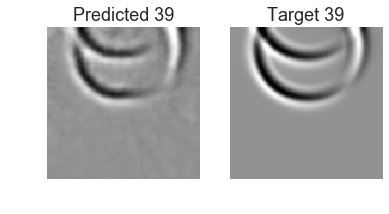

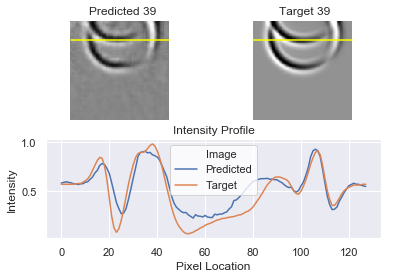

batch_num 0	future_frame_idx 40	type Reinsert
torch.Size([16, 123, 128, 128]) torch.Size([16, 123, 128, 128])
batch_num 0	future_frame_idx 41	type Propagate
torch.Size([16, 126, 128, 128]) torch.Size([16, 126, 128, 128])
batch_num 0	future_frame_idx 42	type Propagate
torch.Size([16, 129, 128, 128]) torch.Size([16, 129, 128, 128])
batch_num 0	future_frame_idx 43	type Propagate
torch.Size([16, 132, 128, 128]) torch.Size([16, 132, 128, 128])
batch_num 0	future_frame_idx 44	type Propagate
torch.Size([16, 135, 128, 128]) torch.Size([16, 135, 128, 128])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


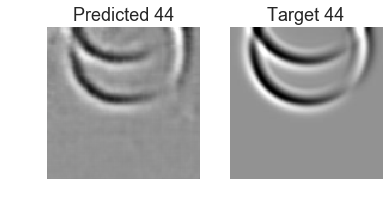

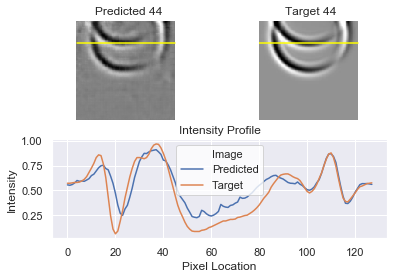

batch_num 0	future_frame_idx 45	type Propagate
torch.Size([16, 138, 128, 128]) torch.Size([16, 138, 128, 128])
batch_num 0	future_frame_idx 46	type Propagate
torch.Size([16, 141, 128, 128]) torch.Size([16, 141, 128, 128])
batch_num 0	future_frame_idx 47	type Propagate
torch.Size([16, 144, 128, 128]) torch.Size([16, 144, 128, 128])
batch_num 0	future_frame_idx 48	type Propagate
torch.Size([16, 147, 128, 128]) torch.Size([16, 147, 128, 128])
batch_num 0	future_frame_idx 49	type Propagate
torch.Size([16, 150, 128, 128]) torch.Size([16, 150, 128, 128])


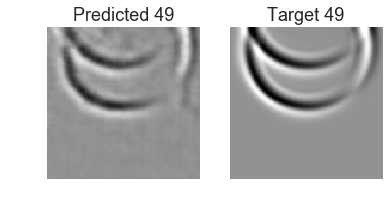

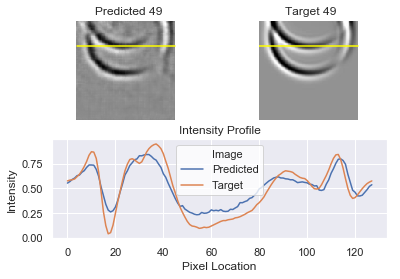

batch_num 0	future_frame_idx 50	type Reinsert
torch.Size([16, 153, 128, 128]) torch.Size([16, 153, 128, 128])
batch_num 0	future_frame_idx 51	type Propagate
torch.Size([16, 156, 128, 128]) torch.Size([16, 156, 128, 128])
batch_num 0	future_frame_idx 52	type Propagate
torch.Size([16, 159, 128, 128]) torch.Size([16, 159, 128, 128])
batch_num 0	future_frame_idx 53	type Propagate
torch.Size([16, 162, 128, 128]) torch.Size([16, 162, 128, 128])
batch_num 0	future_frame_idx 54	type Propagate
torch.Size([16, 165, 128, 128]) torch.Size([16, 165, 128, 128])


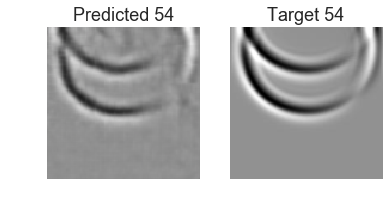

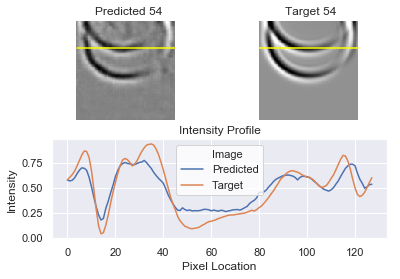

batch_num 0	future_frame_idx 55	type Propagate
torch.Size([16, 168, 128, 128]) torch.Size([16, 168, 128, 128])
batch_num 0	future_frame_idx 56	type Propagate
torch.Size([16, 171, 128, 128]) torch.Size([16, 171, 128, 128])
batch_num 0	future_frame_idx 57	type Propagate
torch.Size([16, 174, 128, 128]) torch.Size([16, 174, 128, 128])
batch_num 0	future_frame_idx 58	type Propagate
torch.Size([16, 177, 128, 128]) torch.Size([16, 177, 128, 128])
batch_num 0	future_frame_idx 59	type Propagate
torch.Size([16, 180, 128, 128]) torch.Size([16, 180, 128, 128])


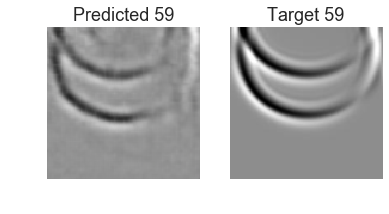

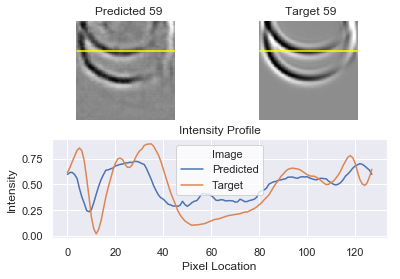

batch_num 0	future_frame_idx 60	type Reinsert
torch.Size([16, 183, 128, 128]) torch.Size([16, 183, 128, 128])
batch_num 0	future_frame_idx 61	type Propagate
torch.Size([16, 186, 128, 128]) torch.Size([16, 186, 128, 128])
batch_num 0	future_frame_idx 62	type Propagate
torch.Size([16, 189, 128, 128]) torch.Size([16, 189, 128, 128])
batch_num 0	future_frame_idx 63	type Propagate
torch.Size([16, 192, 128, 128]) torch.Size([16, 192, 128, 128])
batch_num 0	future_frame_idx 64	type Propagate
torch.Size([16, 195, 128, 128]) torch.Size([16, 195, 128, 128])


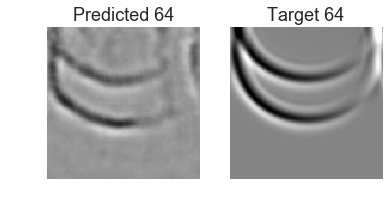

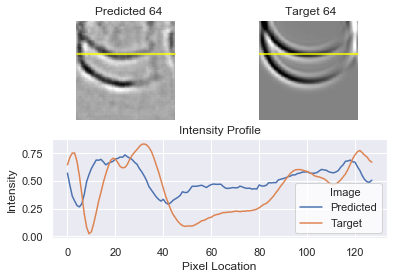

batch_num 0	future_frame_idx 65	type Propagate
torch.Size([16, 198, 128, 128]) torch.Size([16, 198, 128, 128])
batch_num 0	future_frame_idx 66	type Propagate
torch.Size([16, 201, 128, 128]) torch.Size([16, 201, 128, 128])
batch_num 0	future_frame_idx 67	type Propagate
torch.Size([16, 204, 128, 128]) torch.Size([16, 204, 128, 128])
batch_num 0	future_frame_idx 68	type Propagate
torch.Size([16, 207, 128, 128]) torch.Size([16, 207, 128, 128])
batch_num 0	future_frame_idx 69	type Propagate
torch.Size([16, 210, 128, 128]) torch.Size([16, 210, 128, 128])


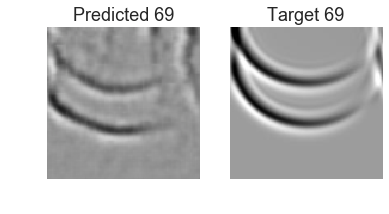

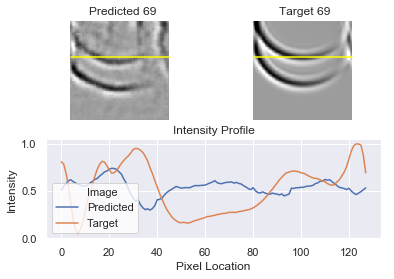

batch_num 0	future_frame_idx 70	type Reinsert
torch.Size([16, 213, 128, 128]) torch.Size([16, 213, 128, 128])
batch_num 0	future_frame_idx 71	type Propagate
torch.Size([16, 216, 128, 128]) torch.Size([16, 216, 128, 128])
batch_num 0	future_frame_idx 72	type Propagate
torch.Size([16, 219, 128, 128]) torch.Size([16, 219, 128, 128])
batch_num 0	future_frame_idx 73	type Propagate
torch.Size([16, 222, 128, 128]) torch.Size([16, 222, 128, 128])
batch_num 0	future_frame_idx 74	type Propagate
torch.Size([16, 225, 128, 128]) torch.Size([16, 225, 128, 128])


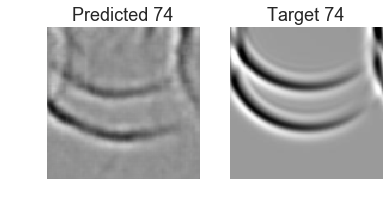

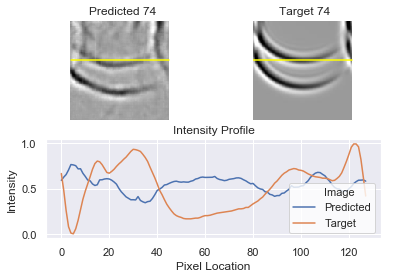

batch_num 0	future_frame_idx 75	type Propagate
torch.Size([16, 228, 128, 128]) torch.Size([16, 228, 128, 128])
batch_num 0	future_frame_idx 76	type Propagate
torch.Size([16, 231, 128, 128]) torch.Size([16, 231, 128, 128])
batch_num 0	future_frame_idx 77	type Propagate
torch.Size([16, 234, 128, 128]) torch.Size([16, 234, 128, 128])
batch_num 0	future_frame_idx 78	type Propagate
torch.Size([16, 237, 128, 128]) torch.Size([16, 237, 128, 128])
batch_num 0	future_frame_idx 79	type Propagate
torch.Size([16, 240, 128, 128]) torch.Size([16, 240, 128, 128])


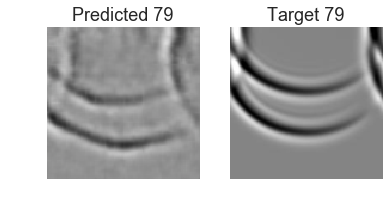

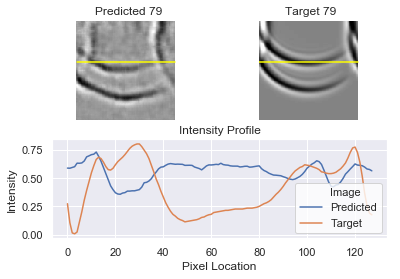

batch_num 0	future_frame_idx 80	type Reinsert
torch.Size([16, 243, 128, 128]) torch.Size([16, 240, 128, 128])
batch_num 0	future_frame_idx 81	type Propagate
torch.Size([16, 246, 128, 128]) torch.Size([16, 240, 128, 128])
batch_num 0	future_frame_idx 82	type Propagate
torch.Size([16, 249, 128, 128]) torch.Size([16, 240, 128, 128])
batch_num 0	future_frame_idx 83	type Propagate
torch.Size([16, 252, 128, 128]) torch.Size([16, 240, 128, 128])
batch_num 0	future_frame_idx 84	type Propagate
torch.Size([16, 255, 128, 128]) torch.Size([16, 240, 128, 128])


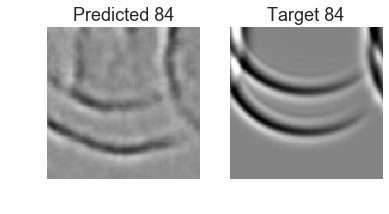

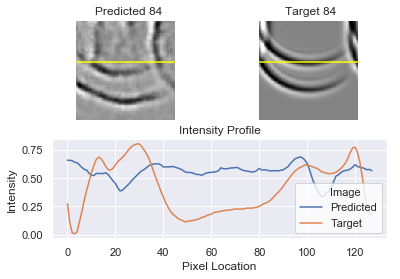

batch_num 0	future_frame_idx 85	type Propagate
torch.Size([16, 258, 128, 128]) torch.Size([16, 240, 128, 128])
batch_num 0	future_frame_idx 86	type Propagate
torch.Size([16, 261, 128, 128]) torch.Size([16, 240, 128, 128])
batch_num 0	future_frame_idx 87	type Propagate
torch.Size([16, 264, 128, 128]) torch.Size([16, 240, 128, 128])
batch_num 0	future_frame_idx 88	type Propagate
torch.Size([16, 267, 128, 128]) torch.Size([16, 240, 128, 128])
batch_num 0	future_frame_idx 89	type Propagate
torch.Size([16, 270, 128, 128]) torch.Size([16, 240, 128, 128])


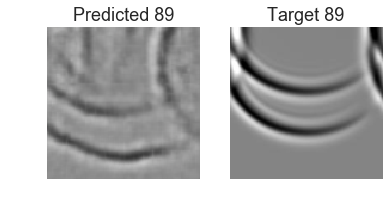

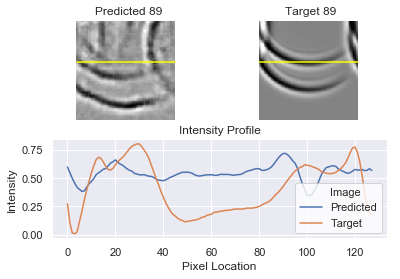

batch_num 0	future_frame_idx 90	type Reinsert
torch.Size([16, 273, 128, 128]) torch.Size([16, 240, 128, 128])
batch_num 0	future_frame_idx 91	type Propagate
torch.Size([16, 276, 128, 128]) torch.Size([16, 240, 128, 128])
batch_num 0	future_frame_idx 92	type Propagate
torch.Size([16, 279, 128, 128]) torch.Size([16, 240, 128, 128])
batch_num 0	future_frame_idx 93	type Propagate
torch.Size([16, 282, 128, 128]) torch.Size([16, 240, 128, 128])
batch_num 0	future_frame_idx 94	type Propagate
torch.Size([16, 285, 128, 128]) torch.Size([16, 240, 128, 128])


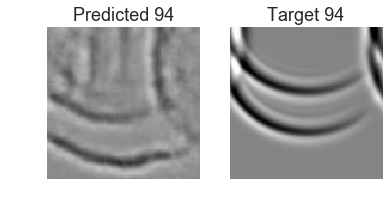

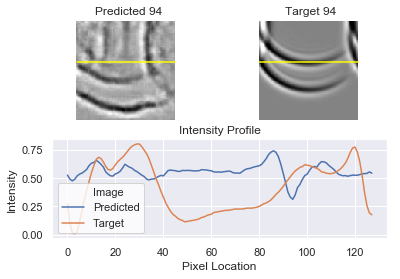

batch_num 0	future_frame_idx 95	type Propagate
torch.Size([16, 288, 128, 128]) torch.Size([16, 240, 128, 128])
batch_num 0	future_frame_idx 96	type Propagate
torch.Size([16, 291, 128, 128]) torch.Size([16, 240, 128, 128])
batch_num 0	future_frame_idx 97	type Propagate
torch.Size([16, 294, 128, 128]) torch.Size([16, 240, 128, 128])
batch_num 0	future_frame_idx 98	type Propagate
torch.Size([16, 297, 128, 128]) torch.Size([16, 240, 128, 128])
batch_num 0	future_frame_idx 99	type Propagate
torch.Size([16, 300, 128, 128]) torch.Size([16, 240, 128, 128])


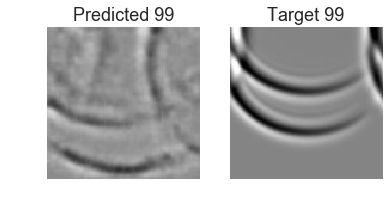

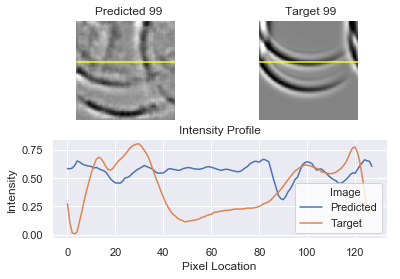

batch_num 0	future_frame_idx 100	type Reinsert
torch.Size([16, 303, 128, 128]) torch.Size([16, 240, 128, 128])
batch_num 0	future_frame_idx 101	type Propagate
torch.Size([16, 306, 128, 128]) torch.Size([16, 240, 128, 128])
batch_num 0	future_frame_idx 102	type Propagate
torch.Size([16, 309, 128, 128]) torch.Size([16, 240, 128, 128])
batch_num 0	future_frame_idx 103	type Propagate
torch.Size([16, 312, 128, 128]) torch.Size([16, 240, 128, 128])
batch_num 0	future_frame_idx 104	type Propagate
torch.Size([16, 315, 128, 128]) torch.Size([16, 240, 128, 128])


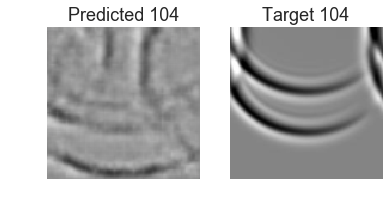

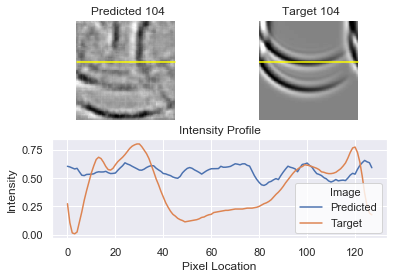

batch_num 0	future_frame_idx 105	type Propagate
torch.Size([16, 318, 128, 128]) torch.Size([16, 240, 128, 128])
batch_num 0	future_frame_idx 106	type Propagate
torch.Size([16, 321, 128, 128]) torch.Size([16, 240, 128, 128])
batch_num 0	future_frame_idx 107	type Propagate
torch.Size([16, 324, 128, 128]) torch.Size([16, 240, 128, 128])
batch_num 0	future_frame_idx 108	type Propagate
torch.Size([16, 327, 128, 128]) torch.Size([16, 240, 128, 128])
batch_num 0	future_frame_idx 109	type Propagate
torch.Size([16, 330, 128, 128]) torch.Size([16, 240, 128, 128])


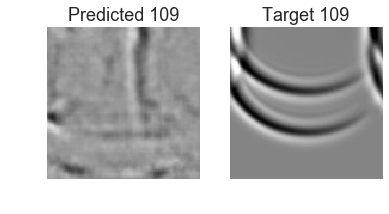

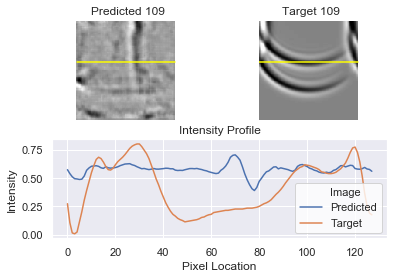

batch_num 0	future_frame_idx 110	type Reinsert
torch.Size([16, 333, 128, 128]) torch.Size([16, 240, 128, 128])
batch_num 0	future_frame_idx 111	type Propagate
torch.Size([16, 336, 128, 128]) torch.Size([16, 240, 128, 128])
batch_num 0	future_frame_idx 112	type Propagate
torch.Size([16, 339, 128, 128]) torch.Size([16, 240, 128, 128])
batch_num 0	future_frame_idx 113	type Propagate
torch.Size([16, 342, 128, 128]) torch.Size([16, 240, 128, 128])
batch_num 0	future_frame_idx 114	type Propagate
torch.Size([16, 345, 128, 128]) torch.Size([16, 240, 128, 128])


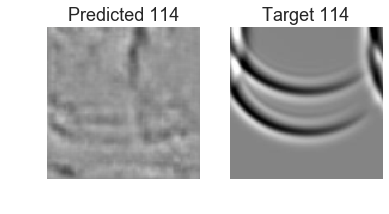

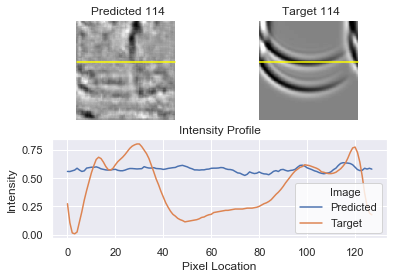

batch_num 0	future_frame_idx 115	type Propagate
torch.Size([16, 348, 128, 128]) torch.Size([16, 240, 128, 128])
batch_num 0	future_frame_idx 116	type Propagate
torch.Size([16, 351, 128, 128]) torch.Size([16, 240, 128, 128])
batch_num 0	future_frame_idx 117	type Propagate
torch.Size([16, 354, 128, 128]) torch.Size([16, 240, 128, 128])
batch_num 0	future_frame_idx 118	type Propagate
torch.Size([16, 357, 128, 128]) torch.Size([16, 240, 128, 128])
batch_num 0	future_frame_idx 119	type Propagate
torch.Size([16, 360, 128, 128]) torch.Size([16, 240, 128, 128])


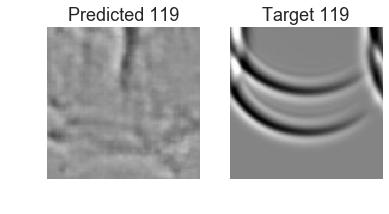

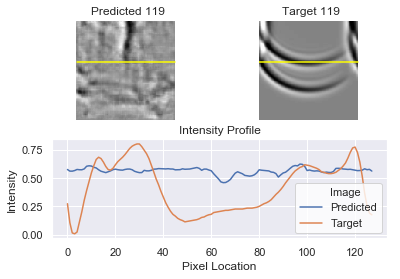

batch_num 0	future_frame_idx 120	type Reinsert
torch.Size([16, 363, 128, 128]) torch.Size([16, 240, 128, 128])
batch_num 0	future_frame_idx 121	type Propagate
torch.Size([16, 366, 128, 128]) torch.Size([16, 240, 128, 128])
batch_num 0	future_frame_idx 122	type Propagate
torch.Size([16, 369, 128, 128]) torch.Size([16, 240, 128, 128])
batch_num 0	future_frame_idx 123	type Propagate
torch.Size([16, 372, 128, 128]) torch.Size([16, 240, 128, 128])
batch_num 0	future_frame_idx 124	type Propagate
torch.Size([16, 375, 128, 128]) torch.Size([16, 240, 128, 128])


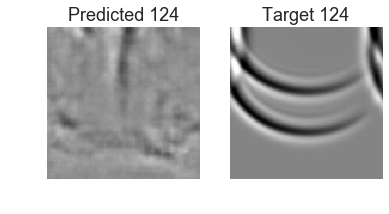

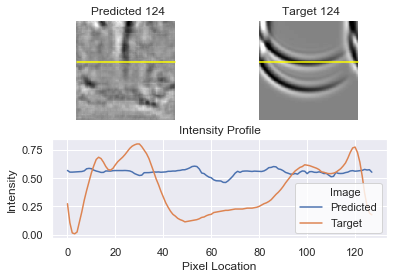

batch_num 0	future_frame_idx 125	type Propagate
torch.Size([16, 378, 128, 128]) torch.Size([16, 240, 128, 128])
batch_num 0	future_frame_idx 126	type Propagate
torch.Size([16, 381, 128, 128]) torch.Size([16, 240, 128, 128])
batch_num 0	future_frame_idx 127	type Propagate
torch.Size([16, 384, 128, 128]) torch.Size([16, 240, 128, 128])
batch_num 0	future_frame_idx 128	type Propagate
torch.Size([16, 387, 128, 128]) torch.Size([16, 240, 128, 128])
batch_num 0	future_frame_idx 129	type Propagate
torch.Size([16, 390, 128, 128]) torch.Size([16, 240, 128, 128])


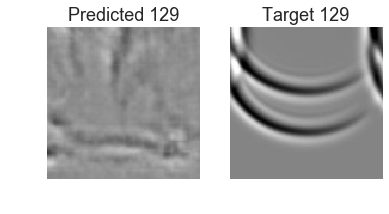

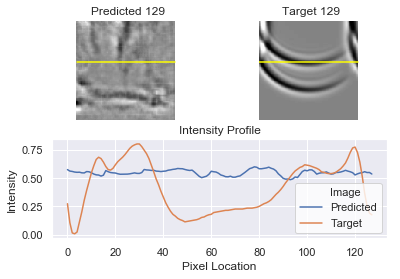

batch_num 0	future_frame_idx 130	type Reinsert
torch.Size([16, 393, 128, 128]) torch.Size([16, 240, 128, 128])
batch_num 0	future_frame_idx 131	type Propagate
torch.Size([16, 396, 128, 128]) torch.Size([16, 240, 128, 128])
batch_num 0	future_frame_idx 132	type Propagate
torch.Size([16, 399, 128, 128]) torch.Size([16, 240, 128, 128])
batch_num 0	future_frame_idx 133	type Propagate
torch.Size([16, 402, 128, 128]) torch.Size([16, 240, 128, 128])
batch_num 0	future_frame_idx 134	type Propagate
torch.Size([16, 405, 128, 128]) torch.Size([16, 240, 128, 128])


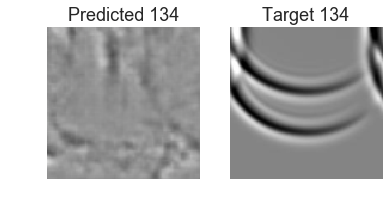

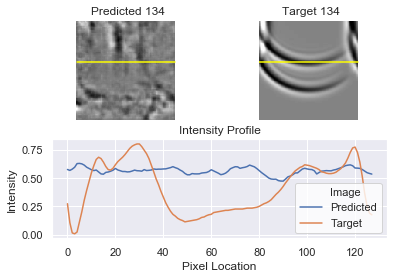

batch_num 0	future_frame_idx 135	type Propagate
torch.Size([16, 408, 128, 128]) torch.Size([16, 240, 128, 128])
batch_num 0	future_frame_idx 136	type Propagate
torch.Size([16, 411, 128, 128]) torch.Size([16, 240, 128, 128])


Traceback (most recent call last):
Traceback (most recent call last):
Exception ignored in: Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/stathis/anaconda3/envs/thesis/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/Users/stathis/anaconda3/envs/thesis/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/Users/stathis/anaconda3/envs/thesis/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/Users/stathis/anaconda3/envs/thesis/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/Users/stathis/anaconda3/envs/thesis/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/Users/stathis/anaconda3/envs/thesis/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
   

KeyboardInterrupt: 

In [15]:
# from utils.WaveDataset import normalize
normalize={'std':1,'mean':0}
starting_point=15
num_input_frames = 5
reinsert_frequency = 10
score_keeper = Scorekeeper(results_dir,channels,normalize)
figures_dir = os.path.join(results_dir, 'figures')
test(model, test_dataloader, starting_point, num_input_frames, reinsert_frequency, 
            channels, device, score_keeper, figures_dir, plot=True, debug=True, normalize=normalize)
score_keeper.plot()

In [ ]:
score_keeper.channels